<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_tasks/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv('/content/restaurant_data.csv')

# Explore the dataset

In [3]:
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

# Distribution of ratings

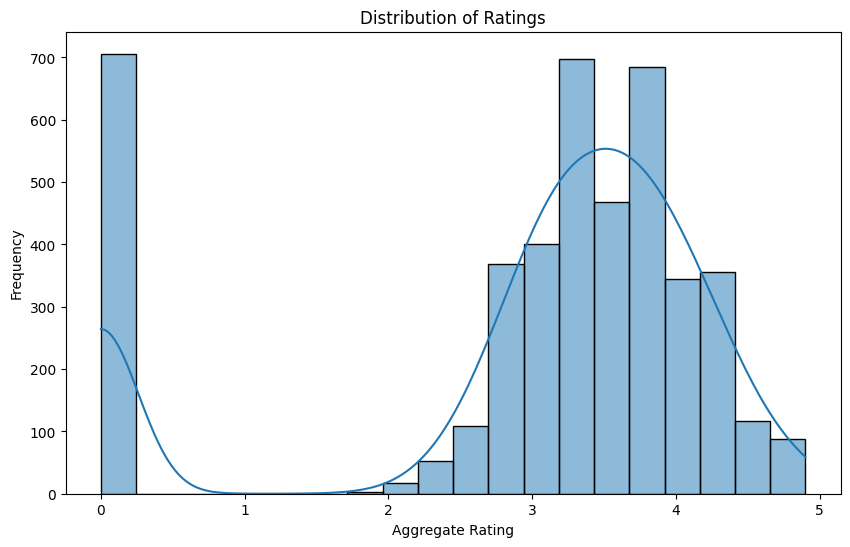

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

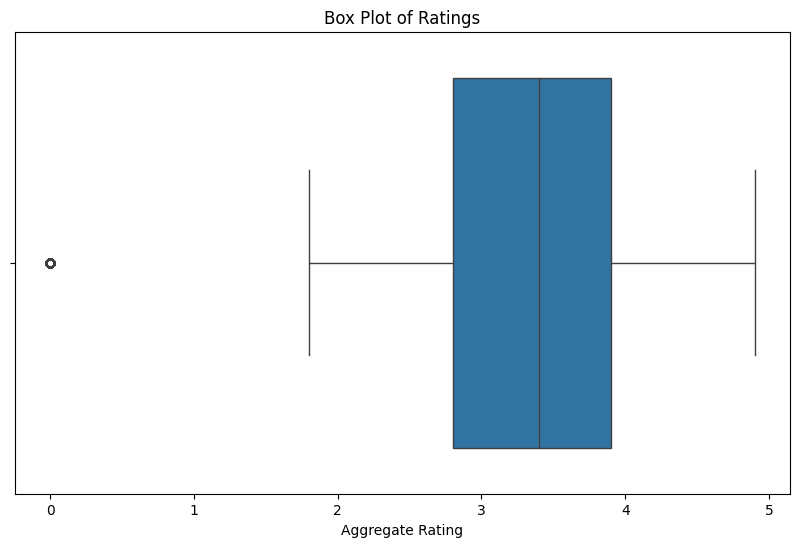

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Aggregate rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Aggregate Rating')
plt.show()

# Compare average ratings of different cuisines

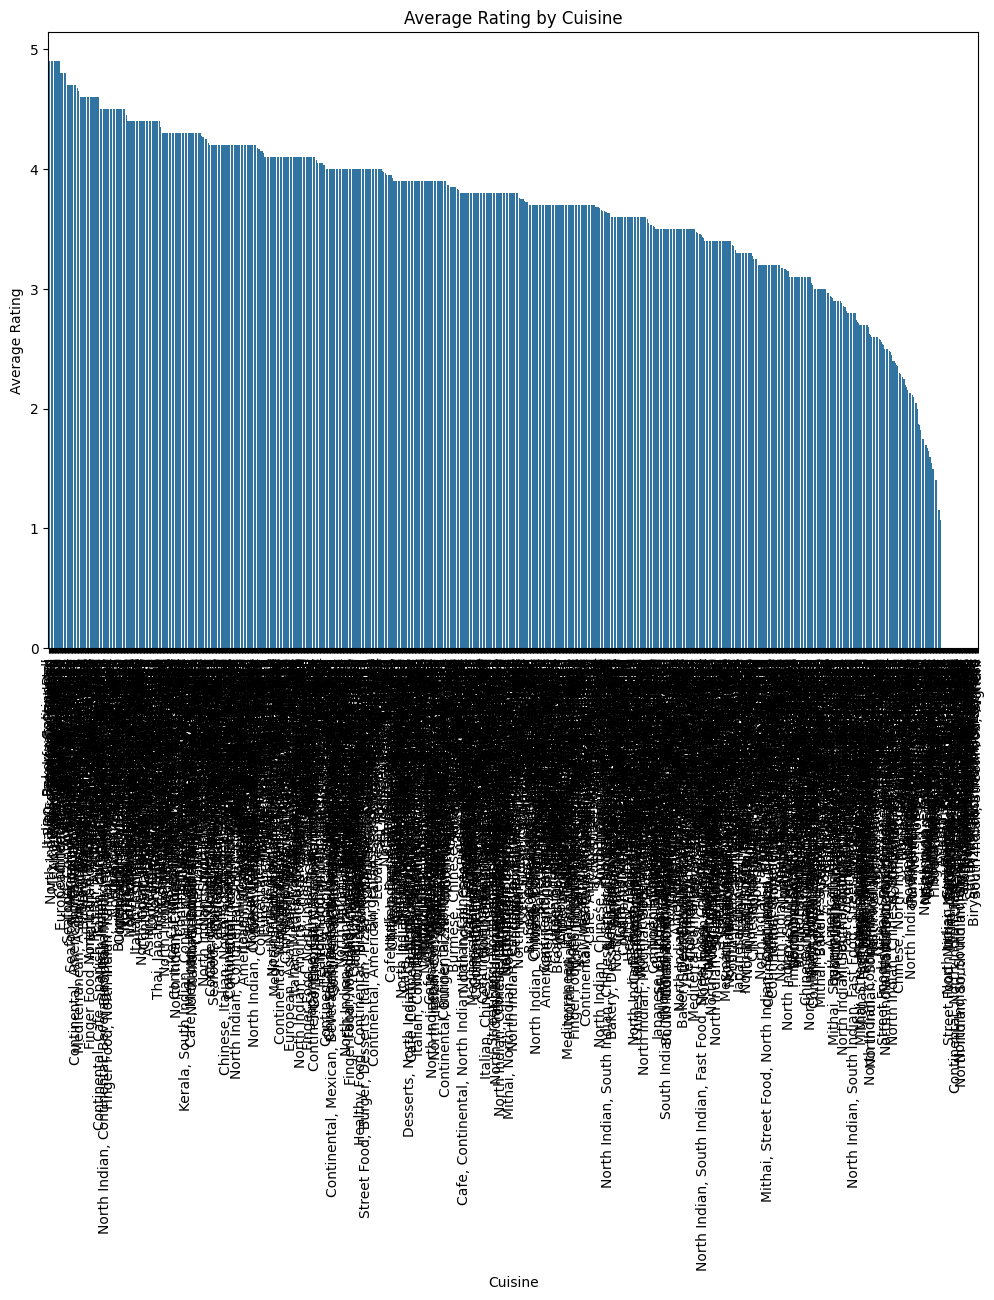

In [6]:
cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_avg_rating.index, y=cuisine_avg_rating.values)
plt.xticks(rotation=90)
plt.title('Average Rating by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.show()

# Visualize the relationship between features and the target variable

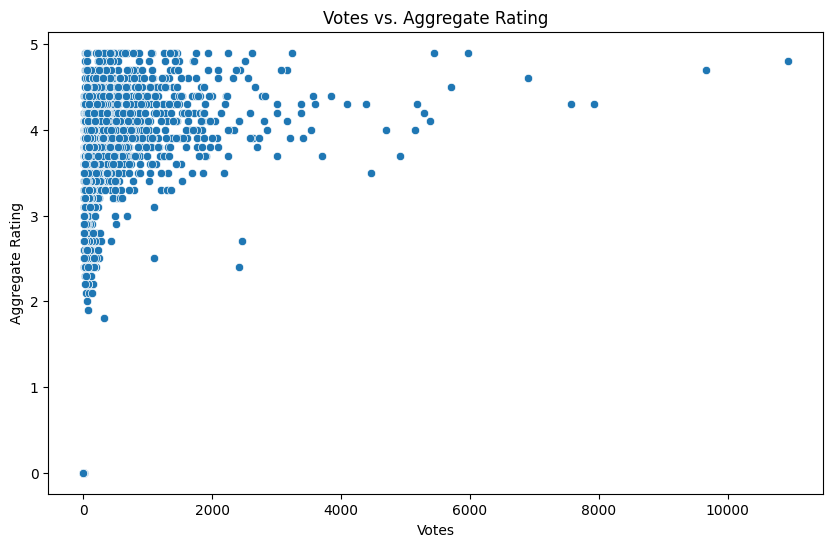

In [9]:
# Scatter plot: votes vs aggregate_rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating')
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# Scatter plot: price_range vs aggregate_rating

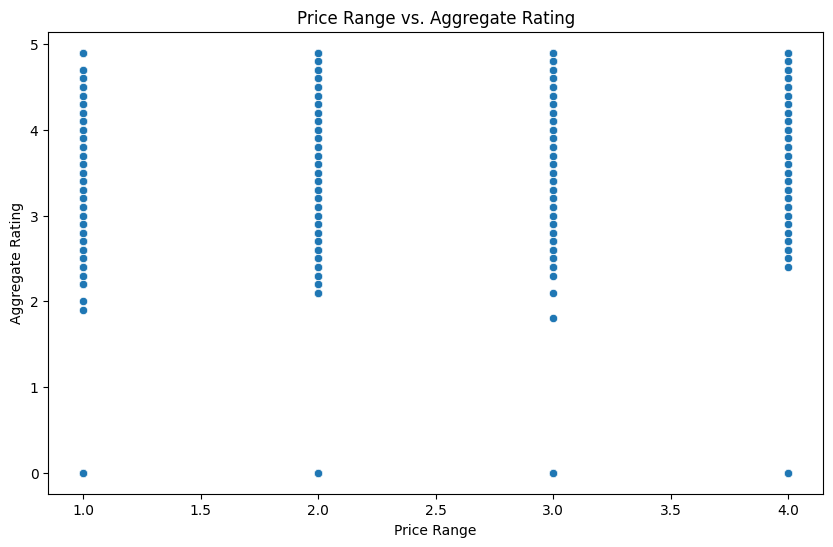

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price range', y='Aggregate rating')
plt.title('Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

# Correlation heatmap

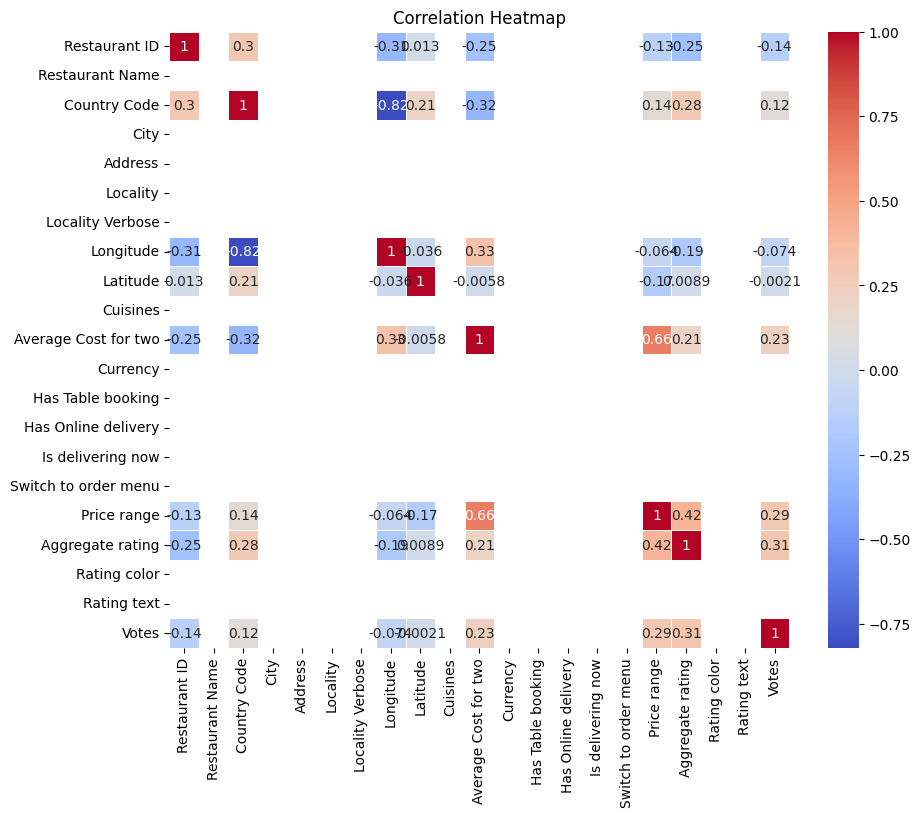

In [12]:
# Convert relevant columns to numeric, handling non-numeric values
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertibles with NaN
        except:
            pass  # Skip columns that cannot be converted

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()